# T1 signal simulation and T1 fitting

### Loading juila packages
This cell only needs to run once when you start the kernel & this notebook

In [1]:
using PyPlot

### T1 signals:
$ M_z(t)=M_z(0)\exp(-\frac{t}{T_1})+M_0(1-\exp(-\frac{t}{T_1})) $
* Immediately after a 180-degree RF pulse, M_z(0) = -M_0
* T1 = 950 msec
* t: 0 to 5000 msec

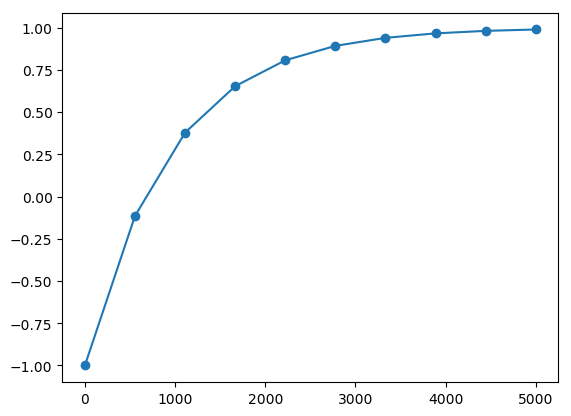

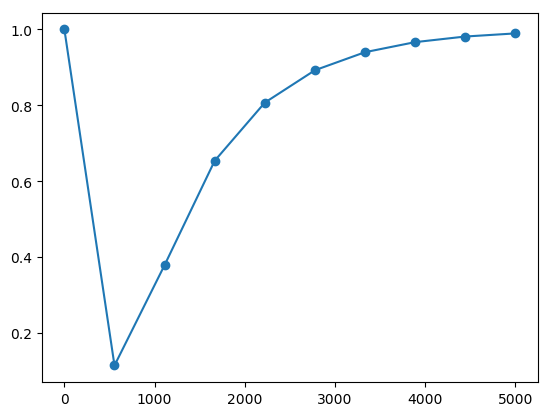

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12d1fcf10>

In [2]:
T1model(t,p) = -p[2]*exp.(-t./p[1]) + M0*(1-exp.(-t./p[1]));
t = linspace(0,5000,10) # 0 to 5000 msec
T1 = 950. # msec --> the input of our simulation
M0 = 1.
Mz0 = -M0
Mz = T1model(t,[T1,M0])
figure(1); plot(t,Mz,"-o")
figure(2); plot(t, abs.(Mz),"-o")

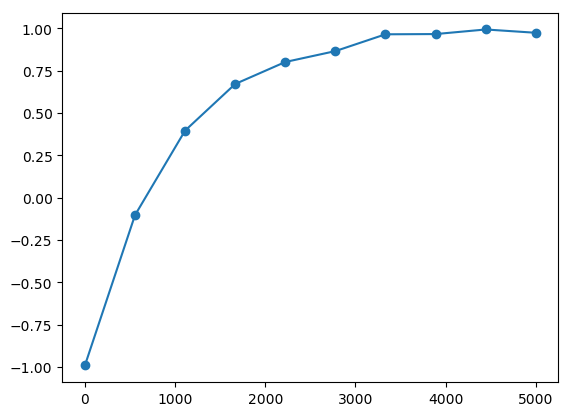

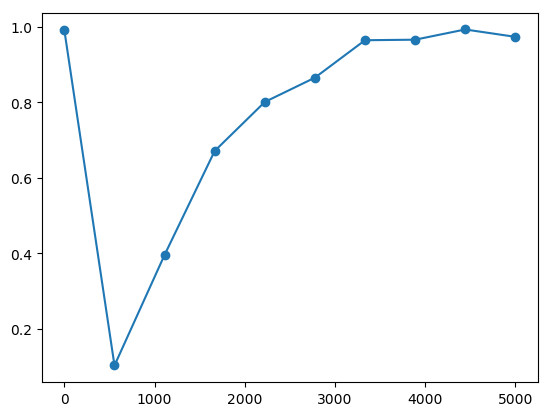

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x117874e10>

In [3]:
MzNoise = Mz0*exp.(-t./T1) + M0*(1-exp.(-t./T1)) + 0.02*M0*randn(size(t)[1]);
figure(1); plot(t,MzNoise,"-o")
figure(2); plot(t, abs.(MzNoise),"-o")

### T1 fitting

In [4]:
# Pkg.add("LsqFit")
using LsqFit
fit = curve_fit(T1model, t, MzNoise, [100,0.5])
fittedParameters = fit.param;
display(fittedParameters[1])

941.6892801492129

### T1 fitting: an approach that removes image background phase
Using the approach reported by [Seong-Gi Kim](https://www.ncbi.nlm.nih.gov/m/pubmed/8208121/), the image background phase can be removed and the subtracted magnitude signals can be fitted more easily.

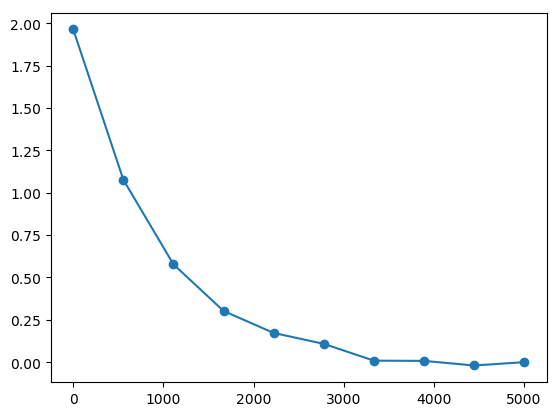

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x12d16af10>

In [5]:
MzNoise2 = MzNoise[end]-MzNoise
figure(1); plot(t,MzNoise2,"-o")

In [11]:
T1model2(t,p) = MzNoise[end] + p[2]*exp.(-t./p[1]) - M0*(1-exp.(-t./p[1]));
fit = curve_fit(T1model2, t, MzNoise2, [100,0.5])
fittedParameters = fit.param;
display(fittedParameters[1])

941.689280149474